#### ライブラリの読み込み

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### データの読み込み

In [51]:
INPUT_DIR = "C:/Users/sato-makoto/OneDrive - Hiroshima University/code/GCI/data/"

train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")
submittion = pd.read_csv(INPUT_DIR + "sample_submission.csv")

train.shape, test.shape, submittion.shape

((171202, 51), (61500, 50), (61500, 2))

#### データを結合

In [52]:
df = pd.concat([train, test])
df.drop("SK_ID_CURR", axis=1, inplace=True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,675000.0,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,0.0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,585000.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,0.0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,270000.0,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,0.0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,135000.0,...,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,234000.0,...,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232702 entries, 0 to 61499
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       171202 non-null  float64
 1   NAME_CONTRACT_TYPE           232702 non-null  object 
 2   CODE_GENDER                  232702 non-null  object 
 3   FLAG_OWN_CAR                 186127 non-null  object 
 4   FLAG_OWN_REALTY              186127 non-null  object 
 5   CNT_CHILDREN                 232702 non-null  int64  
 6   AMT_INCOME_TOTAL             232702 non-null  float64
 7   AMT_CREDIT                   232702 non-null  float64
 8   AMT_ANNUITY                  232693 non-null  float64
 9   AMT_GOODS_PRICE              232486 non-null  float64
 10  NAME_TYPE_SUITE              231707 non-null  object 
 11  NAME_INCOME_TYPE             232702 non-null  object 
 12  NAME_EDUCATION_TYPE          232702 non-null  object 
 13  

#### NAME_CONTRACT_TYPEの数値変換

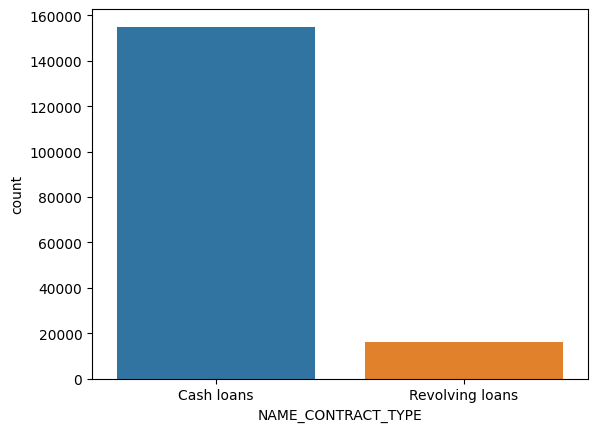

<Figure size 400x400 with 0 Axes>

In [54]:
# NAME_CONTRACT_TYPEの分布
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.figure(figsize=(4, 4))
plt.show()

In [55]:
# 数値型に変換
df["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
df.shape

(232702, 50)

#### CODE_GENDERの処理

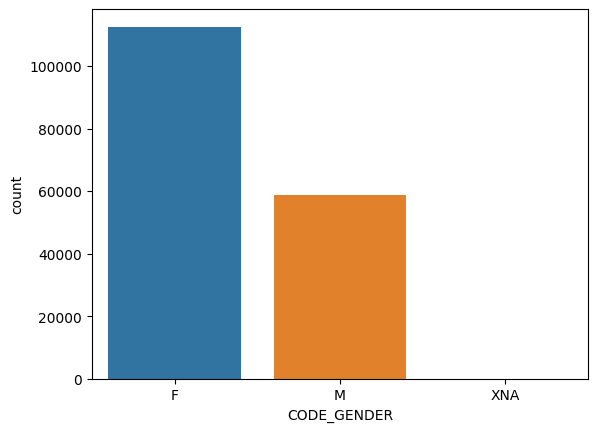

In [56]:
# CODE_GENDERの分布
sns.countplot(data=train, x="CODE_GENDER")
plt.show()

In [57]:
# 数値型に変換
# M:0, F:1, XNA:NaN
df["CODE_GENDER"].replace({'M': 0, 'F': 1, 'XNA': np.nan}, inplace=True)
df.shape

(232702, 50)

In [58]:
df["CODE_GENDER"].value_counts()

1.0    152465
0.0     80233
Name: CODE_GENDER, dtype: int64

#### FLAG_OWN_CARの処理

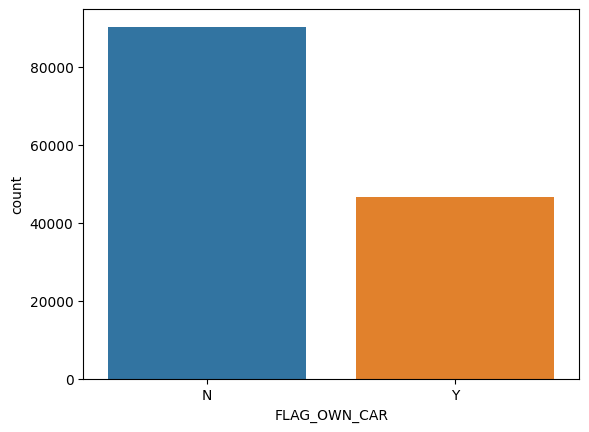

In [59]:
# FLAG_OWN_CARの分布
sns.countplot(data=train, x="FLAG_OWN_CAR")
plt.show()

In [60]:
# 数値型に変換
# N:0, Y:1
df["FLAG_OWN_CAR"].replace({'N': 0, 'Y': 1}, inplace=True)
df.shape

(232702, 50)

#### FLAG_OWN_REALTYの処理

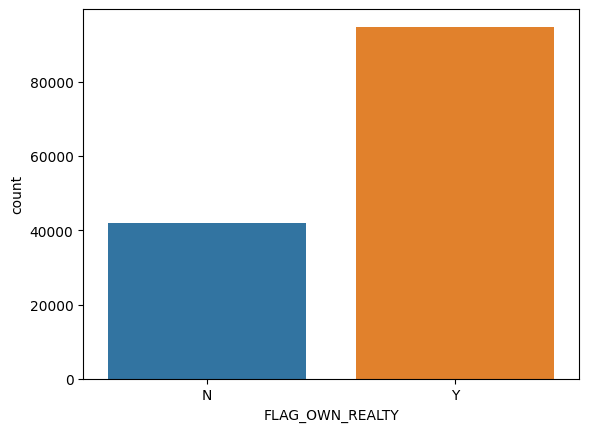

In [61]:
# FLAG_OWN_REALTYの分布
sns.countplot(data=train, x="FLAG_OWN_REALTY")
plt.show()

In [62]:
# 数値型に変換
# N:0, Y:1
df["FLAG_OWN_REALTY"].replace({'N': 0, 'Y': 1}, inplace=True)
df.shape

(232702, 50)

#### AMT_INCOME_TOTALを対数変換

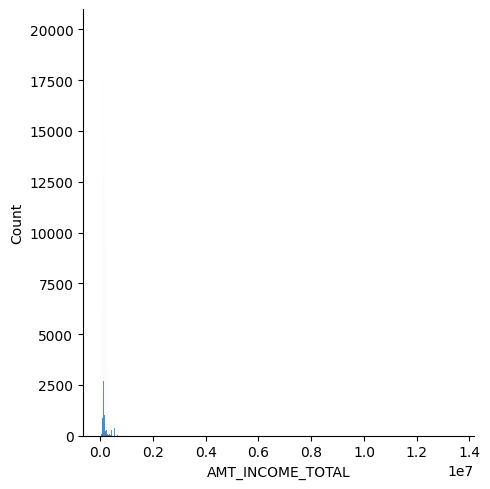

In [63]:
# AMT_INCOME_TOTALの分布
sns.displot(data=train, x="AMT_INCOME_TOTAL")
plt.show()

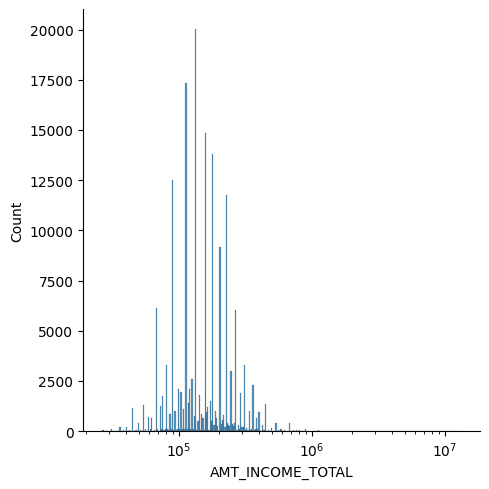

In [64]:
# AMT_INCOME_TOTALの分布（対数変換）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10)
plt.show()

#### OWN_CAR_AGEの処理

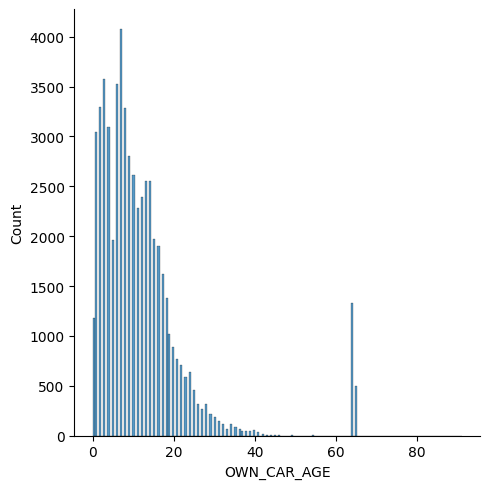

In [65]:
# OWN_CAR_AGEの分布
sns.displot(data=train, x="OWN_CAR_AGE")
plt.show()

外れ値処理

In [66]:
# OWN_CAR_AGEの60以上の値（外れ値）を欠損値扱いする
df.loc[df["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan

OWN_CAR_AGEを0～9年、10～19年のように10年単位でグループ分けした後に、One Hot Encodingを行う

In [67]:
# OWN_CAR_AGEをグループ分け
df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"] // 10

# OWN_CAR_AOWN_CAR_AGEGEをOne Hot Encoding
df_car_age_ohe = pd.get_dummies(df["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")

df = pd.concat([df, df_car_age_ohe], axis=1)
df.drop('OWN_CAR_AGE', axis=1, inplace=True)
df.shape

(232702, 55)

#### NAME_TYPE_SUITEの処理

In [68]:
# NAME_TYPE_SUITEをOne Hot Encoding
df_name_type_suite_ohe = pd.get_dummies(df["NAME_TYPE_SUITE"]).add_prefix("NAME_TYPE_SUITE_")

df = pd.concat([df, df_name_type_suite_ohe], axis=1)
df.drop('NAME_TYPE_SUITE', axis=1, inplace=True)
df.shape

(232702, 61)

#### NAME_INCOME_TYPEの処理

In [69]:
# NAME_INCOME_TYPEをOne Hot Encoding
df_NAME_INCOME_TYPE_ohe = pd.get_dummies(df["NAME_INCOME_TYPE"]).add_prefix("NAME_INCOME_TYPE_")

df = pd.concat([df, df_NAME_INCOME_TYPE_ohe], axis=1)
df.drop('NAME_INCOME_TYPE', axis=1, inplace=True)
df.shape

(232702, 68)

NAME_EDUCATION_TYPEの処理

In [70]:
# NAME_EDUCATION_TYPEをOne Hot Encoding
df_NAME_EDUCATION_TYPE_ohe = pd.get_dummies(df["NAME_EDUCATION_TYPE"]).add_prefix("NAME_EDUCATION_TYPE_")

df = pd.concat([df, df_NAME_EDUCATION_TYPE_ohe], axis=1)
df.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)
df.shape

(232702, 72)

#### NAME_FAMILY_STATUSの処理

In [71]:
# NAME_FAMILY_STATUSをOne Hot Encoding
df_NAME_FAMILY_STATUS_ohe = pd.get_dummies(df["NAME_FAMILY_STATUS"]).add_prefix("NAME_FAMILY_STATUS_")

df = pd.concat([df, df_NAME_FAMILY_STATUS_ohe], axis=1)
df.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)
df.shape

(232702, 77)

#### NAME_HOUSING_TYPEの処理

In [72]:
# NAME_HOUSING_TYPEをOne Hot Encoding
df_NAME_HOUSING_TYPE_ohe = pd.get_dummies(df["NAME_HOUSING_TYPE"]).add_prefix("NAME_HOUSING_TYPE_")

df = pd.concat([df, df_NAME_HOUSING_TYPE_ohe], axis=1)
df.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)
df.shape

(232702, 82)

#### ORGANIZATION_TYPEの処理

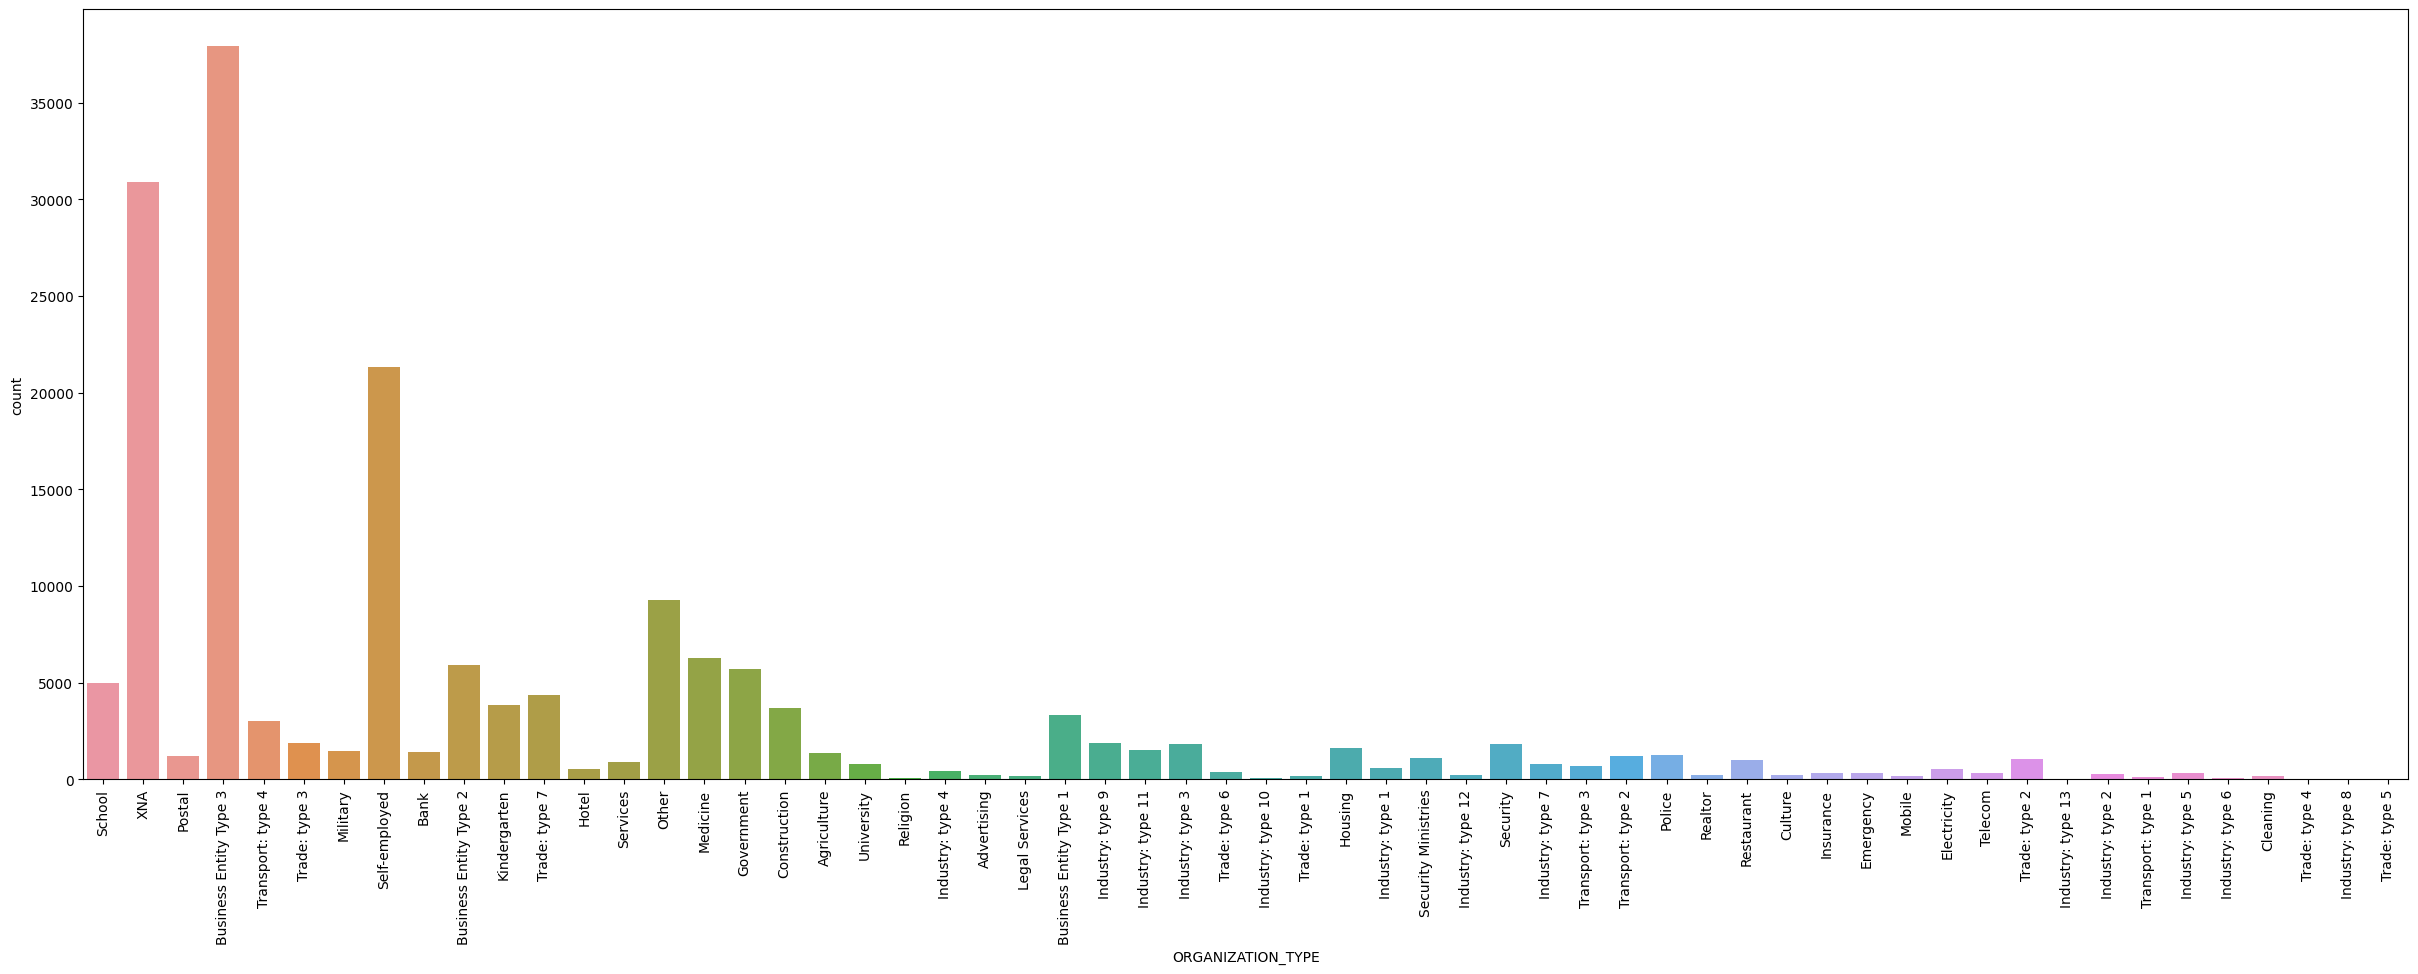

In [73]:
# ORGANIZATION_TYPEの分布
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE")
plt.tick_params(axis="x", rotation=90)
plt.show()

In [74]:
# ORGANIZATION_TYPEをOne Hot Encoding
df_ORGANIZATION_TYPE_ohe = pd.get_dummies(df["ORGANIZATION_TYPE"]).add_prefix("ORGANIZATION_TYPE_")

df = pd.concat([df, df_ORGANIZATION_TYPE_ohe], axis=1)
df.drop('ORGANIZATION_TYPE', axis=1, inplace=True)
df.shape

(232702, 139)

#### OCCUPATION_TYPEの処理

In [75]:
# OCCUPATION_TYPE削除
df = df.drop("OCCUPATION_TYPE", axis=1)

#### 欠損値処理

In [76]:
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()) 
df["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mean()) 
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mean()) 
df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()) 
df["EXT_SOURCE_1"].fillna(df['EXT_SOURCE_1'].mean()) 

0        0.498883
1        0.498883
2        0.498883
3        0.498883
4        0.342344
           ...   
61495    0.263678
61496    0.498883
61497    0.510226
61498    0.353295
61499    0.498883
Name: EXT_SOURCE_1, Length: 232702, dtype: float64

#### CSV出力

In [77]:
df.to_csv(INPUT_DIR + "preprocessed.csv", index=False)